Evolution des quantitées de matière lors d'un titrage conductimétrique
=========================================================

## Les import nécessaires

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Quelques fonctions utiles

### Calcul du volume à l'équivalence

Les solutions seront modélisées dans ce notebook par une structure de donnée appelée tuple en python. Il s'agira d'un **couple (c, V)** représentant respectivement la concentration et le volume de la solution.

In [1]:
def v_eq(acide, base):
    """
    renvoie le volume de solution titrante versé à l'équivalence
    dans le cas du titrage d'un acide par une base.
    acide, base: couple (c, V) concentration, volume
    """
    cA, vA = acide
    cB, = base
    return round((cA / cB) * vA , 4)

Affichons le volume équivalent calculé pour l'exemple du TP.

In [2]:
acide = (0.136, 10.0e-3)
base = (0.10,)
print(v_eq(acide, base))

0.0136


### Tracé des quantités de matières en fonction du volume versé

In [9]:
def tracer_n(ax, v, n_ah, n_ho, n_amoins):
    """
    Effectue le tracé des quantités de matières n_ah, n_ho et n_amoins
    en fonction de v (volume de solution titrante versé)
    v, n_ah, n_ho, n_amoins: tableaux (float) qui contiennent le volume et les qte de matières respectivement
    ax: variable de type 'Axes' de matplotlib
    """
    ax.plot(v, n_ah, '-g', label='$n_{AH}$')
    ax.plot(v, n_ho, '--r', label='$n_{HO^{-}}$')
    ax.plot(v, n_amoins, ':b', label='$n_{A^{-}}$')

    ax.legend()
    ax.set_title('Evolution des quantites de matiere')
    ax.set_xlabel('Volume versé (L)')
    ax.set_ylabel('Quantité de matière (mol)')
    ax.grid()


### Calcul des quantités de matière

La réaction support est:  

$AH_{(aq)} + HO^{-}_{(aq} \longrightarrow A^{-}_{(aq)} + H_2O_{(l)}$ 

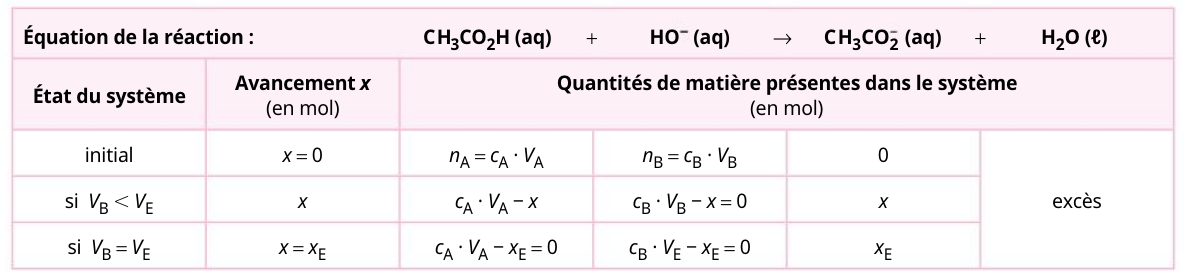

La fonction `qte_matiere` de la cellule suivante permet le calcul des quantités de matières présentes dans le tableau d'évolution.

In [4]:
def qte_matiere(acide, base, volume_verse):
    """
    Calcule et renvoie les quantités de matières du système pour la transformation
    AH + HO- --> A- + H2O. Les valeurs (float) sont renvoyées dans des tableaux
    numpy.
    acide: tuple (c, V) de propriétés de la solution d'acide AH, c et V étant des décimaux 
    représentant la concentration et le volume respectivement;
    base: tuple de propriétés de la base (solution titrante);
    volume_verse: tableau numpy correspondant aux différentes valeurs de volume
    de solution titrante versée.
    """
    v_equiv = v_eq(acide, base) # Calcul du volume à l'équivalence 
    # Pour les expressions des quantités de matière, consulter le tableau d'avancement
    cA, vA = acide
    cB, = base
    n_AH = [cA * vA - cB * vB if vB <= v_equiv else 0 for vB in volume_verse]
    n_HO = [0 if vB <= v_equiv else cB * (vB - v_equiv) for vB in volume_verse]
    n_Amoins = [cB * vB if vB <= v_equiv else cB * v_equiv for vB in volume_verse]
    # On transforme les listes python en tableaux numpy avant renvoi
    return np.array(n_AH), np.array(n_HO), np.array(n_Amoins)
            

**Commentaires du code**

La ligne (n° 15)  

```python
n_AH = [cA * vA - cB * vB if vB <= v_equiv else 0 for vB in volume_verse]
```

correspond à la construction du tableau des quantités de matières d'acide éthanoïque. D'après la documentation de la fonction `acide` est un couple (c, V). Ainsi, cette ligne montre qu'on calcule la quantité de matière d'acide en effectuant $c_A\cdot V_A - c_B\cdot V_B$ jusqu'à l'équivalence. Après l'équivalence, la quantité d'acide est évidemment nulle.  

On construit $n_{HO^{-}}$ et $n_{A^{-}}$ de la même manière (2 lignes suivantes n° 16 et 17):  

* $n_{HO^{-}}=0$ jusqu'à l'équivalence puis augmente $n_{HO^{-}}=c_B\cdot(V_B-V_{eq})$ jusqu'à `vmax`;
* $n_{A^{-}}=c_B\cdot V_B$ jusqu'à l'équivalence puis reste constante.

## Comment suivre un titrage avec ces fonctions écrites en python

On veut suivre l'évolution des quantités de matière lors d'un titrage (*celui du TP du 9/09*). Les caractéristiques des solutions utilisées sont les suivantes:  

* Acide éthanoïque $c_A=0.136\ \mathrm{mol\cdot L^{-1}}$ et $V_A=10,0\ \mathrm{mL}$;
* Hydroxyde de sodium $c_B=0.10\ \mathrm{mol\cdot L^{-1}}$

On procède de la manière suivante:

**1) Calcul des quantités de matière**

In [5]:
VMAX_BURETTE = 25e-3 # Constante: volume de la burette utilisée

# Caractéristiques de la solution
acide = (0.136, 10.0e-3)
base = (0.10,)
# Construction d'un tableau de volume de solution titrante versé
volume_verse = np.linspace(0, VMAX_BURETTE, 50) # On prend -de manière arbitraire- 50 pts de mesure
# Calcul des quantités de matière
n_ah, n_ho, n_amoins = qte_matiere(acide, base, volume_verse)

**2) Tracé**

<IPython.core.display.Javascript object>


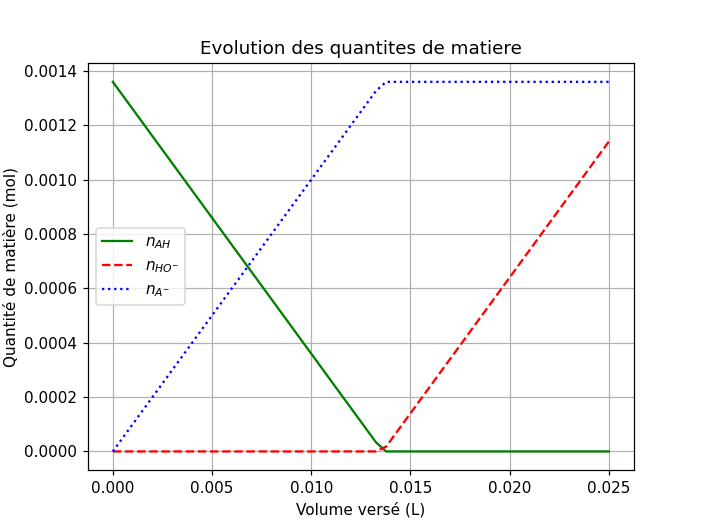

In [10]:
# Création **obligatoire** d'objets utiles à Matplotlib
fig1, ax1 = plt.subplots()

# Réalisation effective du tracé
tracer_n(ax1, volume_verse, n_ah, n_ho, n_amoins)
fig1.show() # Affichage: obligatoire ... ou pas suivant les plateformes

## Travail à effectuer: simulation du titrage d'un vinaigre à 6°

On réalise le titrage d'un volume $V_A=20,0\ \mathrm{mL}$ d'un vinaigre dilué au 1/10 avec une solution d'hydroxyde de sodium de concentration $c_B=0,20\ \mathrm{mol\cdot L^{-1}}$. On utilise une burette de 20 mL.  
En utilisant les cellules précédentes:

* trouver le volume de solution titrante versé à l'équivalence;
* afficher l'évolution des quantités de matière. 

In [11]:
# Cellule réponse


## Evolution de la conductivité

Comme précédemment, quelques fonctions utiles.

### Calcul de la conductivité - Loi de Kohlrausch

In [8]:
# -- Constantes --
# Conductivité molaire ionique
LAMBDA_Na = 5.0
LAMBDA_HO = 20.0
LAMBDA_Amoins = 4.1

# Volume d'eau pour eviter les effets de dilution
V_EAU_AJOUTE = 300e-3

def conductivite(volume_verse, n_Na, n_ho, n_amoins, v=V_EAU_AJOUTE):
    """
    renvoie un tableau de valeurs de conductivité de la solution, calculées pour chaque 
    volume versé;
    volume_verse: tableau de valeurs de volume versé (float)
    n_Na, n_ho, n_amoins: tableaux (float) de quantités de matière des ions présents en solution
    v: volume d'eau ajouté (float)
    """
    # Loi de Kohlrausch
    sigma = (LAMBDA_Na * n_Na + LAMBDA_HO * n_ho + LAMBDA_Amoins * n_amoins) / (v + volume_verse)
    return sigma

### Tracé

In [12]:
def trace_sigma(ax, v, sigma):
    """
    Effectue le tracé de la conductivité en fonction du volume versé
    """
    ax.plot(v, sigma, '-r', label='$\sigma$')
    ax.legend()
    ax.set_title('Evolution de la conductivité')
    ax.set_xlabel('Volume versé (L)')
    ax.set_ylabel('Conductivite ($mS\cdot cm^{-1}$)')
    ax.grid()

## Comment représenter la conductivité lors d'un titrage

**1) Calcul de la conductivité de la solution pour chaque volume versé**

In [9]:
acide = (0.136, 10.0e-3)
base = (0.10,)

cB, = base
n_ah, n_ho, n_amoins = qte_matiere(acide, base, volume_verse)

# n_Na+ = cb * Vb_versé
n_Na = np.array([cB * v for v in volume_verse])

sigma = conductivite(volume_verse, n_Na, n_ho, n_amoins)

**2) Tracé**

<IPython.core.display.Javascript object>


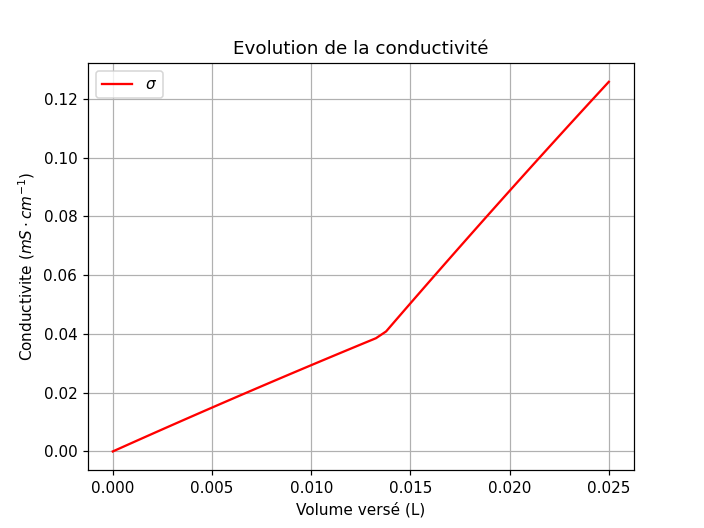

In [11]:
fig2, ax2 = plt.subplots()
trace_sigma(ax2, volume_verse, sigma)
fig2.show()

### Travail à effectuer

En se basant sur le contenu des les cellules précédentes:  

* déterminer (graphiquement) le volume de solution titrante versé à l'équivalence;
* proposer une méthode pour montrer l'influence de l'eau ajouté.

In [ ]:
# Cellule réponse
